In [18]:
#block 1: Import libraries useful for the script.

%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [19]:
#block 2: Import the data file (matlab to python).

data = sio.loadmat('/media/z3525831/Transcend/UNSW/DATA ADCP/CH100_nostructure.mat')

In [20]:
#block 3: Import of variables U, V and time.

data_U = data['U']
data_V = data['V']
data_depth_bin = data['depthV']
data_t = data['t']                                        

In [37]:
print(data_depth_bin)

[[89. 89. 89. ... 89. 89. 89.]
 [85. 85. 85. ... 85. 85. 85.]
 [81. 81. 81. ... 81. 81. 81.]
 ...
 [21. 21. 21. ... 21. 21. 21.]
 [17. 17. 17. ... 17. 17. 17.]
 [13. 13. 13. ... 13. 13. 13.]]


In [36]:
np.shape(data_depth_bin)

(20, 12808)

In [21]:
#block 4: Convert the ADCP time serie dataset (Matlab to python time serie: yyyy/mm/dd hh/mm/ss).

t = data_t[0,:]   
import datetime as dt
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))                    
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

# convert Matlab variable "t" into list of python datetime objects.
time_final = [matlab2datetime(tval) for tval in t]

In [22]:
#block 5: Calculates the variable Speed.

Speed = (data_U*data_U) + (data_V*data_V)
Speed_final = np.sqrt(Speed)  
print(Speed_final)

[[0.21731555 0.22193517 0.22314158 ... 0.2883831  0.30396996 0.31796078]
 [0.24737196 0.25493685 0.26077761 ... 0.33203813 0.34935094 0.36429578]
 [0.26225403 0.26869772 0.27440443 ... 0.35441361 0.37574246 0.39380901]
 ...
 [0.54774506 0.55023827 0.54987409 ... 0.63269792 0.64691238 0.65539337]
 [0.55379133 0.55576751 0.55459619 ... 0.64293029 0.65886753 0.66825355]
 [0.55940958 0.55869468 0.55484652 ... 0.64887066 0.66573888 0.67551113]]


In [23]:
#block 6: Calculates the variable Power density.

Power_density = 0.5 * 1025 *(Speed_final**3)     
Power_density_final = Power_density/1000 
print(Power_density_final)

[[0.00525976 0.00560238 0.00569424 ... 0.01229145 0.01439414 0.01647459]
 [0.00775792 0.00849164 0.00908876 ... 0.01876108 0.02185142 0.02477743]
 [0.00924401 0.00994228 0.0105893  ... 0.02281524 0.02718721 0.03130047]
 ...
 [0.08422272 0.08537805 0.08520864 ... 0.12980251 0.13874913 0.14427797]
 [0.08704269 0.08797785 0.08742276 ... 0.13620264 0.14658455 0.15293881]
 [0.08971882 0.0893753  0.08754119 ... 0.14001297 0.15121874 0.15797611]]


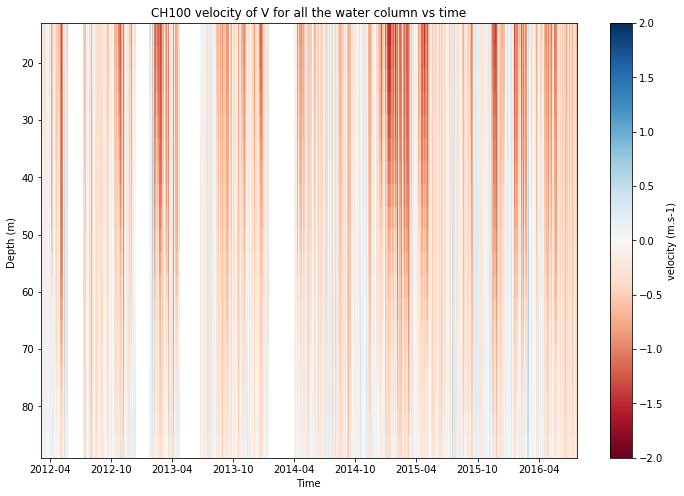

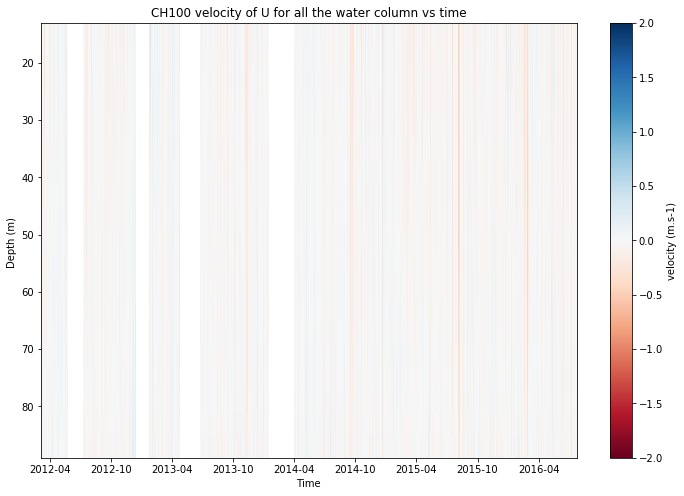

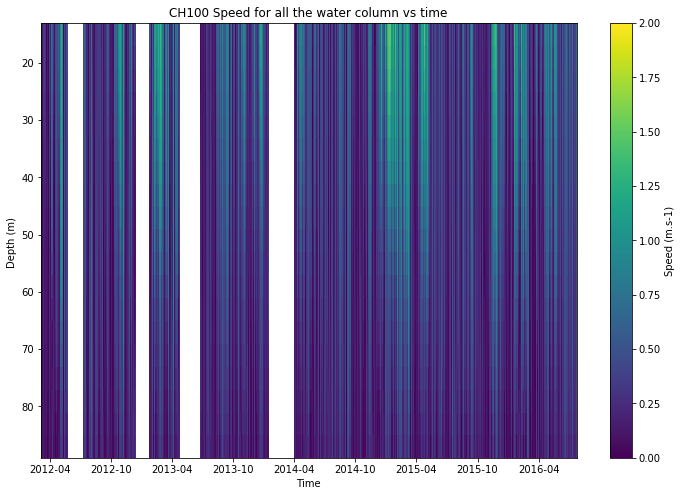

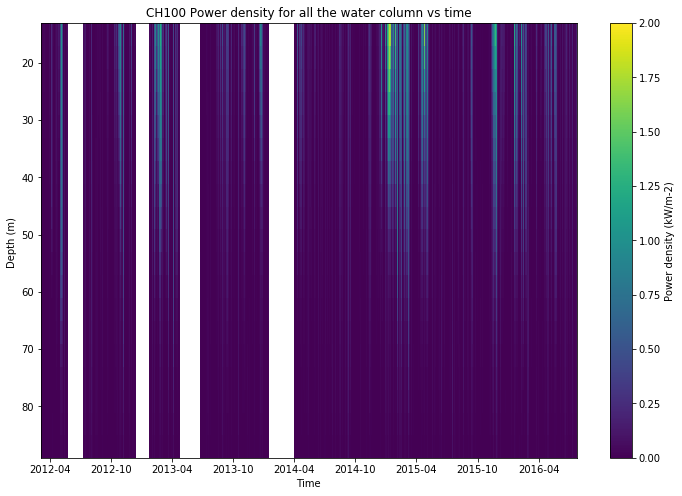

In [30]:
#block 7: Final plot of the U, V, Speed, Power density variables for all the water column vs time.

plt.rcParams['figure.figsize'] = (12,8)
plt.pcolor(time_final,data_depth_bin[:,0],data_V, cmap='RdBu', vmin=-2, vmax=2)
plt.xlabel("Time")             
plt.ylabel("Depth (m) ")         
plt.gca().invert_yaxis()         
plt.title("CH100 velocity of V for all the water column vs time")
clb = plt.colorbar()                 
clb.set_label('velocity (m.s-1)')    
plt.show()  

plt.rcParams['figure.figsize'] = (12,8)
plt.pcolor(time_final,data_depth_bin[:,0],data_U, cmap='RdBu', vmin=-2, vmax=2)
plt.xlabel("Time")             
plt.ylabel("Depth (m) ")         
plt.gca().invert_yaxis()         
plt.title("CH100 velocity of U for all the water column vs time")
clb = plt.colorbar()                 
clb.set_label('velocity (m.s-1)')    
plt.show() 

plt.rcParams['figure.figsize'] = (12,8)
plt.pcolor(time_final,data_depth_bin[:,0],Speed_final, vmin=0, vmax=2)
plt.xlabel("Time")             
plt.ylabel("Depth (m) ")         
plt.gca().invert_yaxis()         
plt.title("CH100 Speed for all the water column vs time")
clb = plt.colorbar()                 
clb.set_label('Speed (m.s-1)')    
plt.show() 

plt.rcParams['figure.figsize'] = (12,8)
plt.pcolor(time_final,data_depth_bin[:,0],Power_density_final, vmin=0, vmax=2)
plt.xlabel("Time")             
plt.ylabel("Depth (m) ")         
plt.gca().invert_yaxis()         
plt.title("CH100 Power density for all the water column vs time")
clb = plt.colorbar()                 
clb.set_label('Power density (kW/m-2)')    
plt.show() 

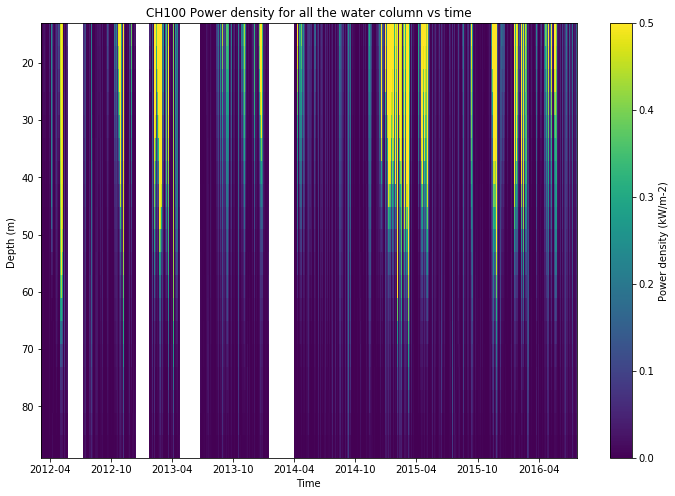

In [29]:
plt.rcParams['figure.figsize'] = (12,8)
plt.pcolor(time_final,data_depth_bin[:,0],Power_density_final, vmin=0, vmax=0.5)
plt.xlabel("Time")             
plt.ylabel("Depth (m) ")         
plt.gca().invert_yaxis()         
plt.title("CH100 Power density for all the water column vs time")
clb = plt.colorbar()                 
clb.set_label('Power density (kW/m-2)')    
plt.show() 